In [ ]:
# Satellite Imagery Analysis in Python

## Task 1: Open satellite imagery in Python 

Let us import the libraries. 

### Open an image


In [1]:
import rasterio as rio

In [2]:
# Open with Rasterio. Let us call it data
data = rio.open('small_stacked.tif')

### META Data

* Coordinate Reference System (CRS)

In [3]:
data.crs

CRS.from_epsg(32633)

* width and height

In [4]:
data.height

831

In [5]:
data.width

1092

* Image Bands

In [6]:
data.count

13

* The sentinel 2 data has 13 bands. The following table shows the band name and its resolution
<img src="images/s2-bands.png" width=1600 height=1600 />


* Meta data

In [7]:
data.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 1092,
 'height': 831,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 367310.0,
        0.0, -10.0, 6163410.0)}

## Task 2: Reading Satellite Image bands

In [8]:
data

<open DatasetReader name='small_stacked.tif' mode='r'>

### Read Individual Band

* Read the Red Band / Band 4


In [9]:
red = data.read(4)
red

array([[ 261.,  262.,  263., ..., -999., -999., -999.],
       [ 274.,  265.,  267., ..., -999., -999., -999.],
       [ 280.,  271.,  270., ..., -999., -999., -999.],
       ...,
       [1616., 1249.,  949., ..., 1535., 1597., 1857.],
       [1519., 1691., 1609., ..., 1804., 1835., 1961.],
       [ 890., 1219., 1298., ..., 1973., 1959., 2027.]], dtype=float32)

* Read the Green Band 

In [10]:
green = data.read(3)
green

array([[ 470.,  474.,  488., ..., -999., -999., -999.],
       [ 468.,  483.,  482., ..., -999., -999., -999.],
       [ 473.,  481.,  481., ..., -999., -999., -999.],
       ...,
       [1491., 1242., 1061., ..., 1327., 1408., 1631.],
       [1520., 1600., 1460., ..., 1571., 1554., 1668.],
       [ 970., 1215., 1366., ..., 1631., 1652., 1696.]], dtype=float32)

### Statistical Values of the Image

* Mean Pixel Value

In [11]:
red.mean()

952.64935

In [12]:
green.mean()

1027.1161

* The image size (Width and Height)

We can also print out the shape of the image when we read the band. 

### Reading All Bands

In [14]:
image_allbands = data.read()
image_allbands

array([[[1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        ...,
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.]],

       [[ 775.,  784.,  782., ..., -999., -999., -999.],
        [ 782.,  784.,  785., ..., -999., -999., -999.],
        [ 784.,  797.,  792., ..., -999., -999., -999.],
        ...,
        [1553., 1274., 1082., ..., 1428., 1447., 1600.],
        [1648., 1734., 1611., ..., 1565., 1571., 1621.],
        [1057., 1253., 1451., ..., 1583., 1606., 1657.]],

       [[ 470.,  474.,  488., ..., -999., -999., -999.],
        [ 468.,  483.,  482., ..., -999., -999., -999.],
        [ 473.,  481.,  481., ..., -999., -999., -999.],
        ...,
        [1491., 1242., 1061., ..., 1327., 1408., 1631.],
        [1520., 1600., 1460., ..., 1571., 155

In [15]:
image_allbands.shape

(13, 831, 1092)

## Task 3: Visualize Images

In [16]:
from rasterio.plot import show

### Simple Plot

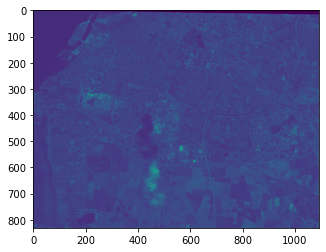

In [18]:
show(red)

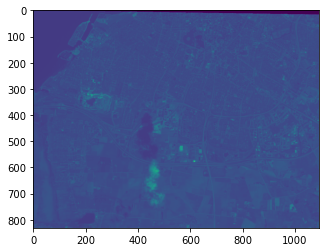

In [19]:
show(green)

### Increasing Plot size

In [21]:
import matplotlib.pyplot as plt

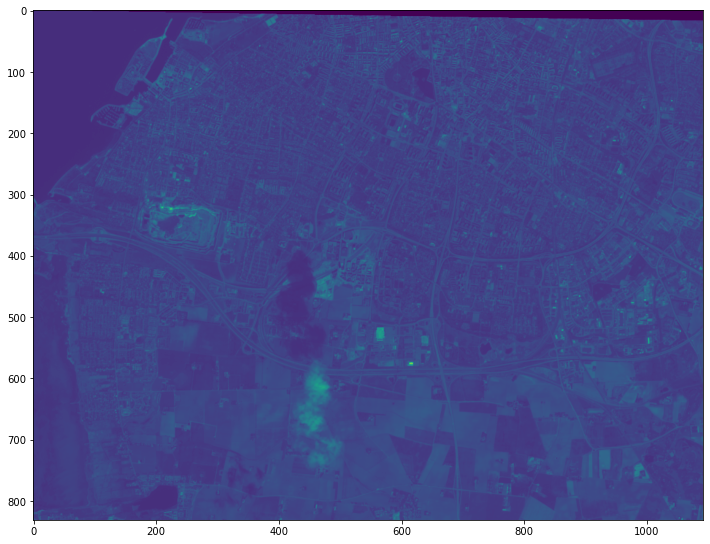

In [22]:
fig,ax = plt.subplots(figsize=(12,10))
show(red, ax=ax)

### Change Colors

* https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

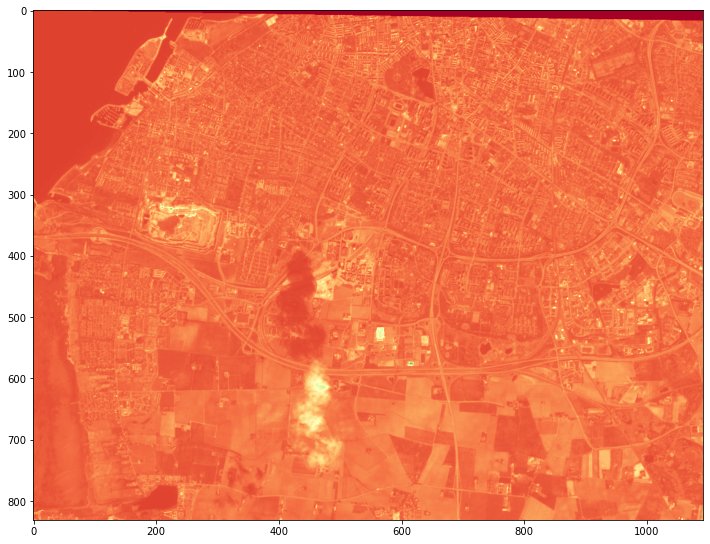

In [23]:
fig,ax = plt.subplots(figsize=(12,10))
show(red, ax=ax, cmap='RdYlGn')

## Task 4: Numpy Array Manipulations

In [24]:
#Call red band (Arrays)

red

array([[ 261.,  262.,  263., ..., -999., -999., -999.],
       [ 274.,  265.,  267., ..., -999., -999., -999.],
       [ 280.,  271.,  270., ..., -999., -999., -999.],
       ...,
       [1616., 1249.,  949., ..., 1535., 1597., 1857.],
       [1519., 1691., 1609., ..., 1804., 1835., 1961.],
       [ 890., 1219., 1298., ..., 1973., 1959., 2027.]], dtype=float32)

In [25]:
# Red band shape
red.shape


(831, 1092)

In [26]:
# Call all band image arrays
image_allbands


array([[[1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        ...,
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.]],

       [[ 775.,  784.,  782., ..., -999., -999., -999.],
        [ 782.,  784.,  785., ..., -999., -999., -999.],
        [ 784.,  797.,  792., ..., -999., -999., -999.],
        ...,
        [1553., 1274., 1082., ..., 1428., 1447., 1600.],
        [1648., 1734., 1611., ..., 1565., 1571., 1621.],
        [1057., 1253., 1451., ..., 1583., 1606., 1657.]],

       [[ 470.,  474.,  488., ..., -999., -999., -999.],
        [ 468.,  483.,  482., ..., -999., -999., -999.],
        [ 473.,  481.,  481., ..., -999., -999., -999.],
        ...,
        [1491., 1242., 1061., ..., 1327., 1408., 1631.],
        [1520., 1600., 1460., ..., 1571., 155

In [27]:
# Call image_allbands shape
image_allbands.shape

(13, 831, 1092)

### Create subset Images with Indexes

In [28]:
# Row indexes
red[200:600]


array([[ 262.,  258.,  259., ..., 1299., 1243., 1100.],
       [ 260.,  260.,  254., ..., 1202., 1142., 1048.],
       [ 266.,  259.,  251., ..., 1102.,  984.,  860.],
       ...,
       [ 589.,  641.,  719., ..., 1410., 1063.,  957.],
       [ 587.,  630.,  681., ..., 1381., 1235.,  968.],
       [ 613.,  600.,  618., ..., 1259., 1304., 1025.]], dtype=float32)

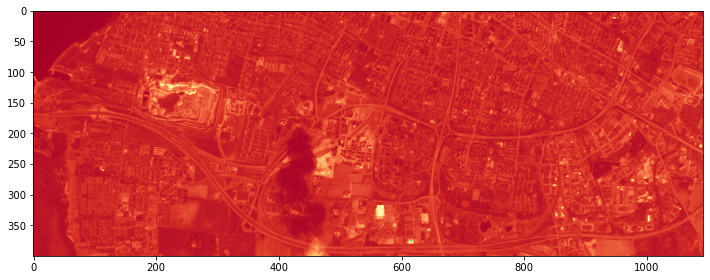

In [29]:
# Visualize row indexing
fig,ax = plt.subplots(figsize=(12,10))
show(red[200:600], ax=ax, cmap='RdYlGn')

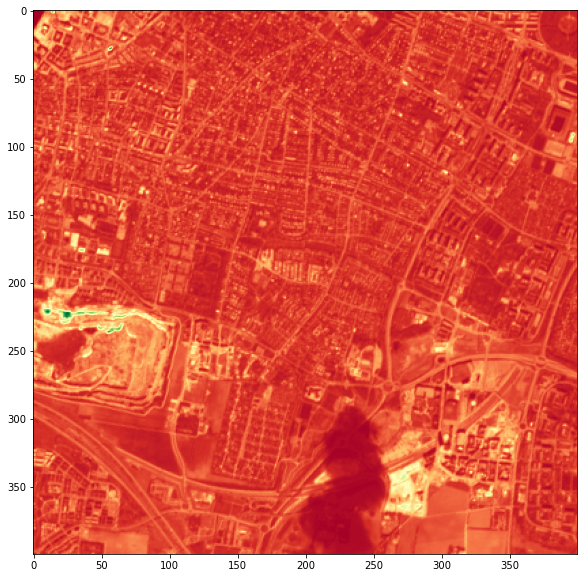

In [30]:
# Visualize row & column indexing
# Visualize row indexing
fig,ax = plt.subplots(figsize=(12,10))
show(red[100:500,200:600], ax=ax, cmap='RdYlGn')

## Task 5: Clipping Images to Boundaries


### Read Vector Data

In [31]:
# Import geopandas 
import geopandas as gpd


In [32]:
# Read Vector Data
urban = gpd.read_file('vectors/urban.shp')
urban


FID                                           geometry
0    0  POLYGON ((370300.2496118302 6158624.32816834, ...

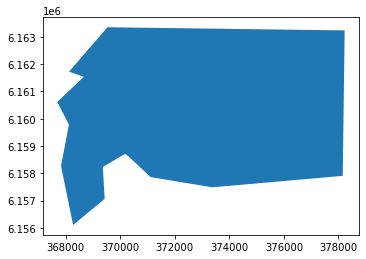

In [34]:
# Plot vector data
urban.plot()

In [13]:
# call vector data


### Mask the Data

In [35]:
# import mask
from rasterio.mask import mask

In [36]:
# Create masked and transform 
clipped_image, image_transform = mask(data, urban.geometry, crop=True)

In [39]:
# Copy the meta
image_meta = data.meta.copy()
image_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 1092,
 'height': 831,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 367310.0,
        0.0, -10.0, 6163410.0)}

In [41]:
# Check image shape
clipped_image.shape


(13, 725, 1054)

In [42]:
# Updata the meta
image_meta.update({
    'width':clipped_image.shape[1],
    'height':clipped_image.shape[2],
    'transform':image_transform
})

### Read Masked Image and Visualize

In [43]:
# Create an empty Image and write to the clipped image
rio.open("clipped.tif","w", **image_meta).write(clipped_image)

In [51]:
# Read clipped image from the output folder
urban_image = rio.open('clipped.tif')
urban_image = urban_image.read()
urban_image.shape

(13, 1054, 725)

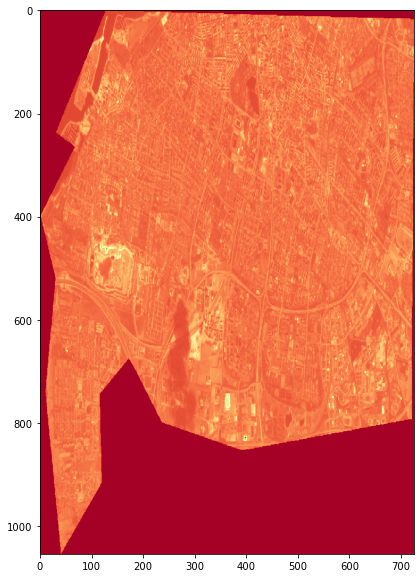

In [54]:
# Visualize the clipped image
fig,ax = plt.subplots(figsize=(12,10))
show(urban_image[3], ax=ax, cmap='RdYlGn')

## Task 6: Create Vegetation Index

### Open Original JP2 Sentinel Images

In [55]:
# Open the original image of band 4
b4 = rio.open('original/T33UUB_20200421T102021_B04.jp2')

In [56]:
# Open the original image of band 8
b8 = rio.open('original/T33UUB_20200421T102021_B08.jp2')

In [57]:
# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

### Calcualte NDVI

In [60]:
# Calculate ndvi
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

In [61]:
ndvi

array([[[-0.3433584 , -0.31414868, -0.30935252, ...,  0.09165278,
          0.37263995,  0.51821324],
        [-0.30243902, -0.31695332, -0.3202934 , ...,  0.206     ,
          0.40412529,  0.53138528],
        [-0.29638554, -0.3101737 , -0.31358025, ...,  0.37397119,
          0.40713963,  0.53918582],
        ...,
        [ 0.08443198,  0.08608161,  0.07961604, ..., -0.36363636,
         -0.35120643, -0.33850129],
        [ 0.08843537,  0.07990996,  0.09131905, ..., -0.31914894,
         -0.32460733, -0.38829787],
        [ 0.0902069 ,  0.0839779 ,  0.08382394, ..., -0.33333333,
         -0.27937337, -0.33512064]]])

### Visualize NDVI

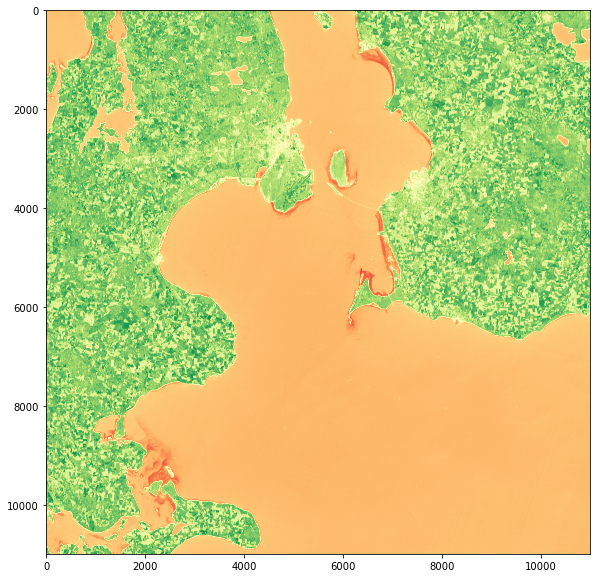

In [62]:
fig,ax = plt.subplots(figsize=(12,10))
show(ndvi, ax=ax, cmap='RdYlGn')

In [63]:
# Call ndvi.shape
ndvi.shape

(1, 10980, 10980)

In [27]:
# Visualize a subset


### Write NDVI to an Image

In [73]:
# Write  an NDVI image 
with rio.open("ndvi","w",
             driver="Gtiff",
             width = b4.width,
             height = b4.height,
             count=1,
             crs = b4.crs,
             transform=b4.transform,
             dtype="float64") as im:
    im.write(ndvi)

## Task 7: Derive Statistics.

In [74]:
# Read Grid Data
grid = gpd.read_file('vectors/grid.shp')
grid.head()

id      left        top     right     bottom  \
0  1.0  300000.0  6200040.0  310000.0  6190040.0   
1  2.0  300000.0  6190040.0  310000.0  6180040.0   
2  3.0  300000.0  6180040.0  310000.0  6170040.0   
3  4.0  300000.0  6170040.0  310000.0  6160040.0   
4  5.0  300000.0  6160040.0  310000.0  6150040.0   

                                            geometry  
0  POLYGON ((300000 6200040, 310000 6200040, 3100...  
1  POLYGON ((300000 6190040, 310000 6190040, 3100...  
2  POLYGON ((300000 6180040, 310000 6180040, 3100...  
3  POLYGON ((300000 6170040, 310000 6170040, 3100...  
4  POLYGON ((300000 6160040, 310000 6160040, 3100...

In [76]:
# Read NDVI 
ndvi_image = rio.open('ndvi')

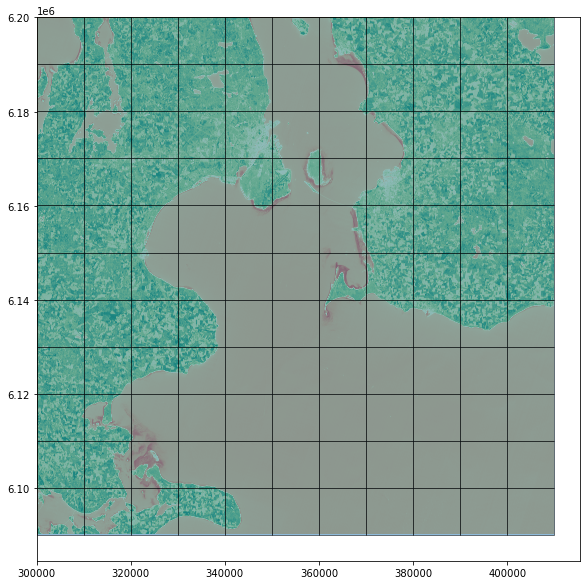

In [78]:
# Plot Both Grid data and NDVI
fig,ax = plt.subplots(figsize=(12,10))
show(ndvi_image, ax=ax, cmap='RdYlGn')
grid.plot(ax=ax, edgecolor='black', alpha=.50)

In [81]:
# Create a funciton to derive stats
def derive_stats(geom, data= ndvi_image):
    masked,_ = mask(dataset=data, shapes=(geom, ), crop=True, all_touched=True, filled= True)
    return masked

In [82]:
# Create a column for Mean
import numpy as np
grid['mean_ndvi'] = grid.geometry.apply(derive_stats).apply(np.mean)

In [83]:
# Grid head
grid.head()

id      left        top     right     bottom  \
0  1.0  300000.0  6200040.0  310000.0  6190040.0   
1  2.0  300000.0  6190040.0  310000.0  6180040.0   
2  3.0  300000.0  6180040.0  310000.0  6170040.0   
3  4.0  300000.0  6170040.0  310000.0  6160040.0   
4  5.0  300000.0  6160040.0  310000.0  6150040.0   

                                            geometry  mean_ndvi  
0  POLYGON ((300000 6200040, 310000 6200040, 3100...  -0.197401  
1  POLYGON ((300000 6190040, 310000 6190040, 3100...   0.300401  
2  POLYGON ((300000 6180040, 310000 6180040, 3100...   0.382746  
3  POLYGON ((300000 6170040, 310000 6170040, 3100...   0.490677  
4  POLYGON ((300000 6160040, 310000 6160040, 3100...   0.474978

In [84]:
# Write to file (shapefile or csv)
grid.to_file("grids_stats.shp")

## Task 8: Clustering

In [85]:
from sklearn.cluster import KMeans

In [87]:
band3 = data.read(3)
band3

array([[ 470.,  474.,  488., ..., -999., -999., -999.],
       [ 468.,  483.,  482., ..., -999., -999., -999.],
       [ 473.,  481.,  481., ..., -999., -999., -999.],
       ...,
       [1491., 1242., 1061., ..., 1327., 1408., 1631.],
       [1520., 1600., 1460., ..., 1571., 1554., 1668.],
       [ 970., 1215., 1366., ..., 1631., 1652., 1696.]], dtype=float32)

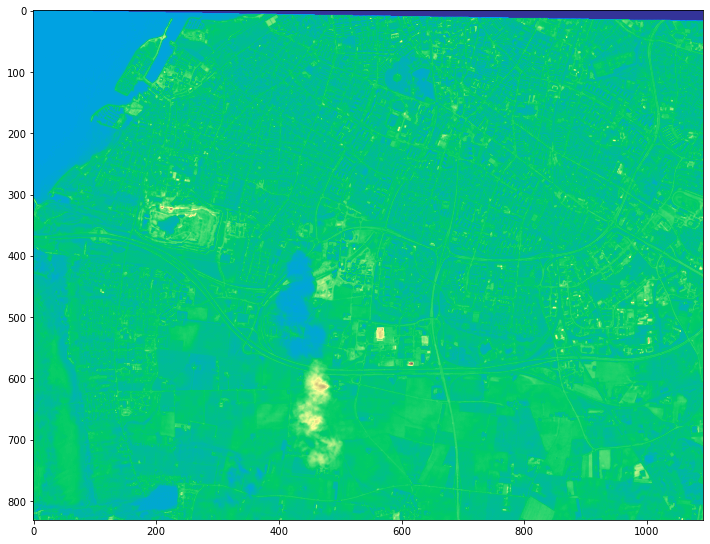

In [89]:
fig,ax = plt.subplots(figsize=(12,10))
show(band3, ax=ax, cmap='terrain')

In [91]:
image_to_cluster = band3.reshape((-1,1))
image_to_cluster.shape

(907452, 1)

In [101]:
kmean = KMeans(n_clusters=5)

In [102]:
kmean.fit(image_to_cluster)

KMeans(n_clusters=5)

In [103]:
clusters = kmean.labels_
clusters

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [104]:
cluster_image = clusters.reshape(band3.shape)

In [105]:
cluster_image.shape

(831, 1092)

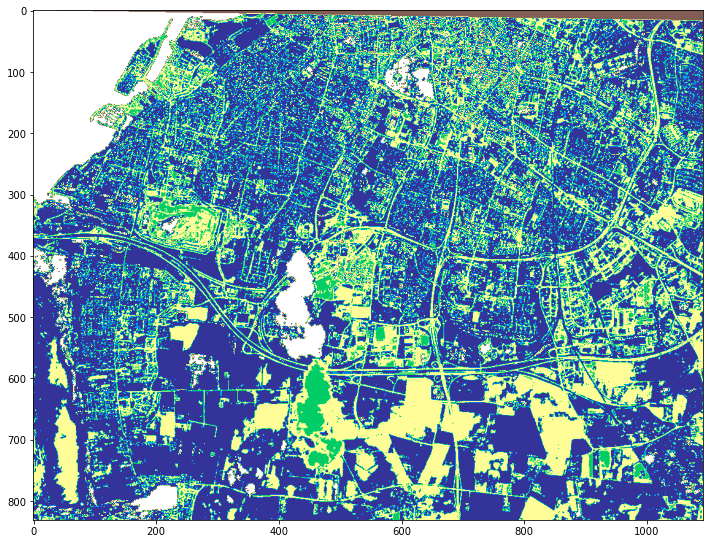

In [106]:
fig,ax = plt.subplots(figsize=(12,10))
show(cluster_image, ax=ax, cmap='terrain')